In [8]:
import pandas as pd
import numpy as np
import string
from collections import Counter
import scipy as sp
from pandas import ExcelWriter
from pandas import ExcelFile
import wikipedia as wk
import re
import random

In [9]:
#for plot
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#NLP word learning packages
from glove import Corpus, Glove
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zijun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zijun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
import pickle
def save_obj(obj, name ):
    with open('./'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('./' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [60]:
#read excel
df = pd.read_excel('data/wine_folly_note.xlsx', sheet_name='Sheet1')

In [61]:
#to add production country 11/21/2019
df_use = df[["Name","Type","Places","Fruit","Body","Sweetness","Dryness","Acidity","Alcohol","Tanin","grapes","Possible Flavors"]]

In [62]:
df_use

,Name,Type,Places,Fruit,Body,Sweetness,Dryness,Acidity,Alcohol,Tanin,grapes,Possible Flavors
0,Cava,Sparkling,"[Penedes, Spain] [Others,Spain]",3,1,0,2,4,2,0,"MACABEO,XARELLO,PARELLADA","Lime,Citrus Zest,Orange,Quince,Green Apple,Yel..."
1,Champagne,Sparkling,"[Champagne, France]",2,1,0,1,5,2,0,"Pinot Noir Grape, Pinot Meunier Grape, Chardon...","Lemon Pith,Lemon,Grapefruit,Lemon Curd,Orange ..."
2,Lambrusco,Sparkling,"[Emilia-Romagna, Italy] [Lombardy,Italy]",4,2,0,3,5,1,0,"Lambrusco Salamino, Lambrusco Grasparossa, Others","Hibiscus, Iris,Rose,Violet,Anise,Rhubarb,Orega..."
3,Prosecco,Sparkling,"[Veneto, Italy] [Fruili, Italy]",4,1,0,2,4,3,0,"Prosecco grapes, Others","Lemon, Lemon Zest,Grapefruit, Orange Peel, Qui..."
4,Albarino,Light-Bodied White,[Spain][Portugal][USA][Others],4,1,0,2,5,3,0,"Albariño Grape, Alvarinho Grape","Lily,Citrus Blossom,Lime Zest,Lemon,Lemon Peel..."
5,Gruner Veltliner,Light-Bodied White,[Austria] [Slovakia] [Czech Republic] [Hungary...,4,2,0,2,4,3,0,Gruner Veltliner Grape,"Fennel,White Pepper,Green Herbs,Apple Blossom,..."
6,Muscadet,Light-Bodied White,"[Loire,France]",1,1,0,1,5,2,0,Muscadet Grape,"Apple Blossom,Chervil,Lime,Lemon,Quince,Green ..."
7,Pinot Gris,Light-Bodied White,[Italy][USA][Germany][Australia][France][Moldo...,2,2,0,2,3,3,0,Pinot Gris Grape,"Acacia,Honeysuckle,Orange Blossom,Mace,Clove,P..."
8,Sauvignon Blanc,Light-Bodied White,[France][New Zealand][Chile][South Africa][Mol...,5,1,0,2,5,3,0,Sauvignon Blanc Grape,"Grass,Jalapeno,Ginger,Gooseberry,Green Herbs,G..."
9,Soave,Light-Bodied White,"[Veneto, Italy]",2,1,0,1,5,3,0,Soave Grape,"Lily,Chervil,Fennel,Lime,Lemon,Preserved Lemon..."


In [63]:
for index,row in df_use.iterrows():
    df_use.loc[index,"Fruit"] = "Fruit_"+ str(row["Fruit"])
    df_use.loc[index,"Body"] = "Body_"+ str(row["Body"])
    df_use.loc[index,"Sweetness"] = "Sweet_"+ str(row["Sweetness"])
    df_use.loc[index,"Dryness"] = "Dryness_"+ str(row["Dryness"])
    df_use.loc[index,"Acidity"] = "Acidity_"+ str(row["Acidity"])
    df_use.loc[index,"Alcohol"] = "Alcohol_"+ str(row["Alcohol"])
    df_use.loc[index,"Tanin"] = "Tanin_"+str(row["Tanin"])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaco

In [64]:
df_use

,Name,Type,Places,Fruit,Body,Sweetness,Dryness,Acidity,Alcohol,Tanin,grapes,Possible Flavors
0,Cava,Sparkling,"[Penedes, Spain] [Others,Spain]",Fruit_3,Body_1,Sweet_0,Dryness_2,Acidity_4,Alcohol_2,Tanin_0,"MACABEO,XARELLO,PARELLADA","Lime,Citrus Zest,Orange,Quince,Green Apple,Yel..."
1,Champagne,Sparkling,"[Champagne, France]",Fruit_2,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_2,Tanin_0,"Pinot Noir Grape, Pinot Meunier Grape, Chardon...","Lemon Pith,Lemon,Grapefruit,Lemon Curd,Orange ..."
2,Lambrusco,Sparkling,"[Emilia-Romagna, Italy] [Lombardy,Italy]",Fruit_4,Body_2,Sweet_0,Dryness_3,Acidity_5,Alcohol_1,Tanin_0,"Lambrusco Salamino, Lambrusco Grasparossa, Others","Hibiscus, Iris,Rose,Violet,Anise,Rhubarb,Orega..."
3,Prosecco,Sparkling,"[Veneto, Italy] [Fruili, Italy]",Fruit_4,Body_1,Sweet_0,Dryness_2,Acidity_4,Alcohol_3,Tanin_0,"Prosecco grapes, Others","Lemon, Lemon Zest,Grapefruit, Orange Peel, Qui..."
4,Albarino,Light-Bodied White,[Spain][Portugal][USA][Others],Fruit_4,Body_1,Sweet_0,Dryness_2,Acidity_5,Alcohol_3,Tanin_0,"Albariño Grape, Alvarinho Grape","Lily,Citrus Blossom,Lime Zest,Lemon,Lemon Peel..."
5,Gruner Veltliner,Light-Bodied White,[Austria] [Slovakia] [Czech Republic] [Hungary...,Fruit_4,Body_2,Sweet_0,Dryness_2,Acidity_4,Alcohol_3,Tanin_0,Gruner Veltliner Grape,"Fennel,White Pepper,Green Herbs,Apple Blossom,..."
6,Muscadet,Light-Bodied White,"[Loire,France]",Fruit_1,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_2,Tanin_0,Muscadet Grape,"Apple Blossom,Chervil,Lime,Lemon,Quince,Green ..."
7,Pinot Gris,Light-Bodied White,[Italy][USA][Germany][Australia][France][Moldo...,Fruit_2,Body_2,Sweet_0,Dryness_2,Acidity_3,Alcohol_3,Tanin_0,Pinot Gris Grape,"Acacia,Honeysuckle,Orange Blossom,Mace,Clove,P..."
8,Sauvignon Blanc,Light-Bodied White,[France][New Zealand][Chile][South Africa][Mol...,Fruit_5,Body_1,Sweet_0,Dryness_2,Acidity_5,Alcohol_3,Tanin_0,Sauvignon Blanc Grape,"Grass,Jalapeno,Ginger,Gooseberry,Green Herbs,G..."
9,Soave,Light-Bodied White,"[Veneto, Italy]",Fruit_2,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_3,Tanin_0,Soave Grape,"Lily,Chervil,Fennel,Lime,Lemon,Preserved Lemon..."


In [65]:
#clean the places
df_use["Places"] = df_use["Places"].str.replace(","," ")
df_use["Places"] = df_use["Places"].str.replace("\]\["," ")
df_use["Places"] = df_use["Places"].str.replace("\[","")
df_use["Places"] = df_use["Places"].str.replace("\]","")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [67]:
#11/22/2019 including the wine name
col_names = df_use.columns

In [68]:
col_names 

Index(['Name', 'Type', 'Places', 'Fruit', 'Body', 'Sweetness', 'Dryness',
       'Acidity', 'Alcohol', 'Tanin', 'grapes', 'Possible Flavors'],
      dtype='object')

In [69]:
df_use[col_names]

,Name,Type,Places,Fruit,Body,Sweetness,Dryness,Acidity,Alcohol,Tanin,grapes,Possible Flavors
0,Cava,Sparkling,Penedes Spain Others Spain,Fruit_3,Body_1,Sweet_0,Dryness_2,Acidity_4,Alcohol_2,Tanin_0,"MACABEO,XARELLO,PARELLADA","Lime,Citrus Zest,Orange,Quince,Green Apple,Yel..."
1,Champagne,Sparkling,Champagne France,Fruit_2,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_2,Tanin_0,"Pinot Noir Grape, Pinot Meunier Grape, Chardon...","Lemon Pith,Lemon,Grapefruit,Lemon Curd,Orange ..."
2,Lambrusco,Sparkling,Emilia-Romagna Italy Lombardy Italy,Fruit_4,Body_2,Sweet_0,Dryness_3,Acidity_5,Alcohol_1,Tanin_0,"Lambrusco Salamino, Lambrusco Grasparossa, Others","Hibiscus, Iris,Rose,Violet,Anise,Rhubarb,Orega..."
3,Prosecco,Sparkling,Veneto Italy Fruili Italy,Fruit_4,Body_1,Sweet_0,Dryness_2,Acidity_4,Alcohol_3,Tanin_0,"Prosecco grapes, Others","Lemon, Lemon Zest,Grapefruit, Orange Peel, Qui..."
4,Albarino,Light-Bodied White,Spain Portugal USA Others,Fruit_4,Body_1,Sweet_0,Dryness_2,Acidity_5,Alcohol_3,Tanin_0,"Albariño Grape, Alvarinho Grape","Lily,Citrus Blossom,Lime Zest,Lemon,Lemon Peel..."
5,Gruner Veltliner,Light-Bodied White,Austria Slovakia Czech Republic Hungary Others,Fruit_4,Body_2,Sweet_0,Dryness_2,Acidity_4,Alcohol_3,Tanin_0,Gruner Veltliner Grape,"Fennel,White Pepper,Green Herbs,Apple Blossom,..."
6,Muscadet,Light-Bodied White,Loire France,Fruit_1,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_2,Tanin_0,Muscadet Grape,"Apple Blossom,Chervil,Lime,Lemon,Quince,Green ..."
7,Pinot Gris,Light-Bodied White,Italy USA Germany Australia France Moldova Hun...,Fruit_2,Body_2,Sweet_0,Dryness_2,Acidity_3,Alcohol_3,Tanin_0,Pinot Gris Grape,"Acacia,Honeysuckle,Orange Blossom,Mace,Clove,P..."
8,Sauvignon Blanc,Light-Bodied White,France New Zealand Chile South Africa Moldova ...,Fruit_5,Body_1,Sweet_0,Dryness_2,Acidity_5,Alcohol_3,Tanin_0,Sauvignon Blanc Grape,"Grass,Jalapeno,Ginger,Gooseberry,Green Herbs,G..."
9,Soave,Light-Bodied White,Veneto Italy,Fruit_2,Body_1,Sweet_0,Dryness_1,Acidity_5,Alcohol_3,Tanin_0,Soave Grape,"Lily,Chervil,Fennel,Lime,Lemon,Preserved Lemon..."


In [70]:
#make Type+....+grapes+possible flavors as the description of the Name of the wine
df_use["description"] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
df_use["grapes"] = df_use["grapes"].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
#put "_" into wine names
df_use["Name"] = df_use["Name"].str.replace(" ","_")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [73]:
#replace space with "_" in grapes and possible flavors
df_use["grapes"] = df_use["grapes"].str.replace(" ","_")
df_use["Possible Flavors"] = df_use["Possible Flavors"].str.replace(" ","_")
df_use["Type"] = df_use["Type"].str.replace(" ","_")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [74]:
for index,row in df_use.iterrows():
    df_use.loc[index,"description"] = ",".join(row[col_names]).lower()
    #df_use.loc[index,"description"]  = df_use.loc[index,"description"].translate(str.maketrans('', '', string.punctuation))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
df_use["description"] = df_use["description"].str.replace(",", " ")
df_use["description"] = df_use["description"].str.replace("_,", " ")
df_use["description"] = df_use["description"].str.replace(",_", " ")
df_use["description"] = df_use["description"].str.replace(" _", " ")
df_use["description"] = df_use["description"].str.replace("_ ", " ")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [76]:
df_use["description"][0] 

'cava sparkling penedes  spain others spain fruit_3 body_1 sweet_0 dryness_2 acidity_4 alcohol_2 tanin_0 macabeo xarello parellada lime citrus_zest orange quince green_apple yellow_apple bruised_apple unripe_pear apricot fig chalk seashell bread sourdough_yeast butter smoke nutmeg almond toast brioche apple_blossom honeysuckle anise cinnamon'

In [77]:
#tokenize
lines = [str(x) if isinstance(x,float) else word_tokenize(x) for x in df_use["description"]]

In [78]:
stop_words = set(stopwords.words('english')) 

In [79]:
#get rid of english stopwords
filtered_lines = []
for l in lines:
    temp = 0
    if l == 'nan':
        temp = ['nan']
    else:
        temp = [w for w in l if (w not in stop_words)]                  
    filtered_lines.append(temp)

In [80]:
#save
save_obj(filtered_lines,"pkl_data/filtered_lines_notes")

In [81]:
filtered_lines = load_obj("pkl_data/filtered_lines_notes")

In [83]:
#check most common words
flatten_lines =  [item for sublist in filtered_lines for item in sublist]
word_counter = Counter(flatten_lines)
word_counter.most_common(10)

[('sweet_0', 49),
 ('others', 43),
 ('dryness_0', 34),
 ('italy', 33),
 ('france', 29),
 ('vanilla', 29),
 ('usa', 29),
 ('tanin_0', 27),
 ('alcohol_4', 22),
 ('acidity_4', 20)]

##### Learn each wine first by the content in the notebook based on wine folly

##### Train

In [84]:
corpus = Corpus() 

In [ ]:
#now train the corpus
#corpus = Corpus() 
corpus.fit(filtered_lines, window=10)
#word embedding of 50
glove = Glove(no_components=50, learning_rate=0.01)
glove.fit(corpus.matrix, epochs=200, no_threads=4, verbose=True)

In [86]:
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [87]:
print(glove.most_similar('france'))

[('australia', 0.9399778896783488), ('spain', 0.932218283576485), ('argentina', 0.8573185634408954), ('usa', 0.8086983954149917)]


In [88]:
sentence_vectors = []
real_vectors = []
embed_n = 50
for each_line in filtered_lines:
    temp = 0
    sum_temp = 0
    if (each_line == 'nan') or (len(each_line) == 0):
        #the vector is 0 if the name is "nan"
        temp = [0]*embed_n
    else:
        #2 vectors are being generated as 2 useful inputs later in the analysis
        #1: mean of the word vectors -> sentence vector
        #2: the word vectors themselves
        temp = np.mean([glove.word_vectors[glove.dictionary[w]] for w in each_line],axis=0)    
        temp_realv = [glove.word_vectors[glove.dictionary[w]] for w in each_line]
    sentence_vectors.append(temp) 
    real_vectors.append(temp_realv)

In [89]:
df_use.iloc[4]

Name                                                         Albarino
Type                                               Light-Bodied_White
Places                                      Spain Portugal USA Others
Fruit                                                         Fruit_4
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_2
Acidity                                                     Acidity_5
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                Albariño_Grape,_Alvarinho_Grape
Possible Flavors    Lily,Citrus_Blossom,Lime_Zest,Lemon,Lemon_Peel...
description         albarino light-bodied_white spain portugal usa...
Name: 4, dtype: object

In [90]:
target = np.array(sentence_vectors[4])

In [91]:
#calculate its Euclidean and Cosine distance with all the other items

Euc_distance = []
Cos_distance = []
temp = 0

for x in sentence_vectors:
    temp = np.linalg.norm(target - np.array(x))
    Euc_distance.append(temp)
    
for x in sentence_vectors:
    temp = sp.spatial.distance.cosine(target,np.array(x))
    Cos_distance.append(temp)

In [92]:
Euc_distance = np.array(Euc_distance)
Cos_distance = np.array(Cos_distance)

In [93]:
Euc_distance.argsort()[1]

3

In [96]:
Euc_distance[3]

0.01026472828167842

In [97]:
df_use.iloc[3]

Name                                                         Prosecco
Type                                                        Sparkling
Places                                    Veneto  Italy Fruili  Italy
Fruit                                                         Fruit_4
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_2
Acidity                                                     Acidity_4
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                        Prosecco_grapes,_Others
Possible Flavors    Lemon,_Lemon_Zest,Grapefruit,_Orange_Peel,_Qui...
description         prosecco sparkling veneto  italy fruili  italy...
Name: 3, dtype: object

In [98]:
#the closest neighbor based on Cosine
Cos_distance.argsort()[1]

10

In [99]:
df_use.loc[10,:]

Name                                                       Vermentino
Type                                               Light-Bodied_White
Places                           France Corsica Italy Sardinia Others
Fruit                                                         Fruit_3
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_2
Acidity                                                     Acidity_4
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                               Vermentino_Grape
Possible Flavors    Dandelion,Wheat_Grass,Mint,Chervil,Chayote_Squ...
description         vermentino light-bodied_white france corsica i...
Name: 10, dtype: object

In [100]:
df_use.loc[3,"Possible Flavors"]

'Lemon,_Lemon_Zest,Grapefruit,_Orange_Peel,_Quince,_Green_Apple,_Pear,Yellow_Apple,Honeydew_Melon,White_Peach,Apricot,Kiwi,Pineapple,Fruit_Cup,Acacia,Honeysuckle,Gardenia,Citrus_Blossom,Saline,Honey,Creamy'

In [101]:
df_use.loc[4,"Possible Flavors"]

'Lily,Citrus_Blossom,Lime_Zest,Lemon,Lemon_Peel,Grapefruit_Pith,Grapefruit,Orange_Peel_Tangerine,Honeydew_Melon,Apple,Nectarine,Peach,Papaya,Beeswax,Minerals,Crushed_Gravel,_Quinine,Saline'

##### according to euclidean the most similar white to albarino is prosecco (splarking)
##### according to cos the most similar is Vermentino (light-bodied white)
##### in this case, Cosine distance offers a better answer

In [43]:
#now I want to add the corpus by using wikipedia to help expand those flavors
test_v = wk.suggest("boyenberry")
test_v

In [ ]:
#note that this one was run without the "places" column
flavor_details = {}
for x in filtered_lines:
    i = 0
    for y in x:
        if i < 1:
            print(y)
            if y not in flavor_details.keys():
                flavor_details[y]=(wk.page(y+" Wine").content)
        elif i>=8:
            print(y)
            if y not in flavor_details.keys():
                key_word = wk.search(y)[0]
                try:
                    flavor_details[y]=(wk.page(key_word).content)
                except:
                    try:
                        flavor_details[y]=(wk.page(key_word + "(fruit)").content)
                    except:
                        #potting soil
                        try:
                            flavor_details[y]=(wk.page(key_word + "(soil)").content)
                        except:
                            try:
                                flavor_details[y]=(wk.page(key_word + "(spice)").content)
                            except:
                                try:
                                    #iris plant
                                    flavor_details[y]=(wk.page(key_word + "(plant)").content)
                                except:
                                    #rosato wine
                                    flavor_details[y]=(wk.page(key_word + "(wine)").content)
        i = i + 1


In [96]:
save_obj(flavor_details,"pkl_data/flavor_details")

In [104]:
flavor_details = load_obj("pkl_data/flavor_details")

In [105]:
#clean the titles and punctuation for each item in the dictionary
for key, value in flavor_details.items():
    temp_value = re.sub(r'\n\n==.*?==', '', value)
    temp_value = temp_value.replace("\n","")
    temp_value = temp_value.lower()
    #remove all punctuation
    temp_value  = temp_value.translate(str.maketrans('', '', string.punctuation))
    flavor_details[key] = temp_value

In [107]:
#remove english stopwords
#tokenize
flavor_detail_lines = [str(x) if isinstance(x,float) else word_tokenize(x) for k,x in flavor_details.items()]

In [108]:
#get rid of english stopwords
flavor_filtered_lines = []
for l in flavor_detail_lines:
    temp = 0
    if l == 'nan':
        temp = ['nan']
    else:
        temp = [w for w in l if (w not in stop_words)]                  
    flavor_filtered_lines.append(temp)

In [109]:
save_obj(flavor_filtered_lines,"pkl_data/flavor_filtered_lines")

In [110]:
flavor_filtered_lines = load_obj("pkl_data/flavor_filtered_lines")

In [111]:
#check most common words
flavor_flatten_lines =  [item for sublist in flavor_filtered_lines for item in sublist]
word_counter = Counter(flavor_flatten_lines)
word_counter.most_common(10)

[('used', 4610),
 ('also', 3614),
 ('fruit', 3062),
 ('wine', 2513),
 ('may', 2269),
 ('often', 1770),
 ('made', 1769),
 ('known', 1715),
 ('species', 1704),
 ('one', 1623)]

In [112]:
#dictionary before
len(corpus.dictionary)

673

In [113]:
print(glove.word_vectors[glove.dictionary['toffee']])

[ 4.51969091e-03  6.21161265e-03 -5.83941403e-03  1.08028708e-02
 -1.10168640e-02  9.44250668e-03  3.84628723e-03 -6.00255983e-03
 -3.70575209e-03  5.48762294e-03 -7.80725618e-03  4.23709818e-03
  4.26096271e-03 -5.59399356e-03 -5.25400472e-03  1.36820636e-03
 -9.37638892e-03  9.60620098e-03 -3.77733606e-03 -1.00742455e-02
 -5.14216316e-03  1.74243227e-03  9.23655367e-03 -1.04798996e-02
 -8.70138534e-03  8.69936704e-03 -5.31393175e-03  5.43923313e-03
 -1.04207628e-02  9.75254117e-04 -5.35808203e-03  7.87314859e-04
  7.92918315e-04 -7.09438937e-03 -7.17417089e-03 -7.72673352e-03
  7.25132437e-03 -7.47930095e-04 -2.34896094e-03  1.48898284e-05
  4.24293911e-03  1.32729981e-02 -8.22874494e-03  1.05418479e-02
  8.09710985e-03 -4.74575899e-03 -6.72687703e-03  5.86792231e-03
 -8.71887588e-03  3.80452054e-03]


In [114]:
print(glove.most_similar('toffee'))

[('baking_spices', 0.5574039439602593), ('lager', 0.4200709956025022), ('fig', 0.37996856195229334), ('pignatello_grape', 0.3726177459070858)]


In [113]:
#a new instance
#corpus = Corpus()

##### Learn by going through the wikipedia explanation on each of the "Possible Flavors"

In [115]:
#train more on the flavors
corpus.fit(flavor_filtered_lines, window=10)

In [ ]:
glove.fit(corpus.matrix, epochs=200, no_threads=4, verbose=True)

In [117]:
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [124]:
#save the glove model
save_obj(glove,"pkl_data/glove_note_wiki")
save_obj(corpus,"pkl_data/corpus_note_wiki")

In [120]:
len(corpus.dictionary)

65919

In [121]:
print(glove.word_vectors[glove.dictionary['toffee']])

[-0.01482289  0.00286583 -0.09824784 -0.01732922 -0.02394589 -0.103999
  0.04368565 -0.10281649  0.07501269 -0.17527823  0.08560652  0.20348143
 -0.06226733 -0.05401004 -0.12800624 -0.19920151  0.08845724 -0.14135274
  0.04342193 -0.21682185  0.10104614 -0.05948879 -0.12876183  0.11885395
 -0.09802164 -0.08856553  0.09776031  0.06040237  0.10523545  0.05474216
  0.1404423   0.08643417  0.09308864  0.23196956 -0.20118117  0.07473286
 -0.06560512  0.08954364  0.20684827  0.09876137 -0.1284907  -0.06312311
  0.05828323  0.16188376  0.08759475 -0.08195778  0.02586537 -0.1507946
 -0.0793756  -0.01538852]


In [172]:
print(glove.most_similar('toffee'))

[('crumbledairy', 0.8445017555191444), ('nutdairy', 0.8108530388290158), ('minidairy', 0.7877513564751426), ('delightdairy', 0.785964110368969)]


In [173]:
print(glove.most_similar('fruit_4'))

[('zefram', 0.4655218474088032), ('hopscotch', 0.46387312782871415), ('posttranscriptional', 0.4608737142802378), ('0080924441', 0.44232601491675105)]


In [174]:
print(glove.most_similar('white'))

[('chocolatebreakaway', 0.9296516212489231), ('mycelia', 0.9127323601281613), ('exitiosa', 0.9114829934752859), ('zinfandel', 0.9044380744381164)]


In [175]:
print(glove.most_similar('toffee'))

[('crumbledairy', 0.8445017555191444), ('nutdairy', 0.8108530388290158), ('minidairy', 0.7877513564751426), ('delightdairy', 0.785964110368969)]


In [176]:
print(glove.most_similar('butter'))

[('cultured', 0.9586525557420333), ('whisking', 0.9150228694789782), ('melted', 0.8946753132312254), ('cocoa', 0.8739895079566266)]


In [177]:
flavor_sentence_vectors = []
flavor_real_vectors = []
embed_n = 50
for each_line in filtered_lines:
    temp = 0
    sum_temp = 0
    if (each_line == 'nan') or (len(each_line) == 0):
        #the vector is 0 if the name is "nan"
        temp = [0]*embed_n
    else:
        #2 vectors are being generated as 2 useful inputs later in the analysis
        #1: mean of the word vectors -> sentence vector
        #2: the word vectors themselves
        temp = np.mean([glove.word_vectors[glove.dictionary[w]] for w in each_line],axis=0)    
        temp_realv = [glove.word_vectors[glove.dictionary[w]] for w in each_line]
    flavor_sentence_vectors.append(temp) 
    flavor_real_vectors.append(temp_realv)

In [178]:
target = flavor_sentence_vectors[4]
Euc_distance_flavor = []
Cos_distance_flavor = []
temp = 0

for x in flavor_sentence_vectors:
    temp = np.linalg.norm(target - np.array(x))
    Euc_distance_flavor.append(temp)
    
for x in flavor_sentence_vectors:
    temp = sp.spatial.distance.cosine(target,np.array(x))
    Cos_distance_flavor.append(temp)

In [179]:
Euc_distance_flavor = np.array(Euc_distance_flavor)
Cos_distance_flavor = np.array(Cos_distance_flavor)

In [180]:
#the closest neighbor
Euc_distance_flavor.argsort()[1]

10

In [181]:
#the closest neighbor
Cos_distance_flavor.argsort()[1]

9

In [182]:
Euc_distance_flavor[10]

0.11351251127261024

In [183]:
Cos_distance_flavor[9]

0.06303682331728921

In [184]:
df_use.iloc[10]

Name                                                       Vermentino
Type                                               Light-Bodied_White
Places                           France Corsica Italy Sardinia Others
Fruit                                                         Fruit_3
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_2
Acidity                                                     Acidity_4
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                               Vermentino_Grape
Possible Flavors    Dandelion,Wheat_Grass,Mint,Chervil,Chayote_Squ...
description         light-bodied_white france corsica italy sardin...
Name: 10, dtype: object

In [185]:
df_use.iloc[9]

Name                                                            Soave
Type                                               Light-Bodied_White
Places                                                 Veneto  Italy 
Fruit                                                         Fruit_2
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_1
Acidity                                                     Acidity_5
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                                    Soave_Grape
Possible Flavors    Lily,Chervil,Fennel,Lime,Lemon,Preserved_Lemon...
description         light-bodied_white veneto  italy  fruit_2 body...
Name: 9, dtype: object

In [186]:
#target
df_use.iloc[4]

Name                                                         Albarino
Type                                               Light-Bodied_White
Places                                      Spain Portugal USA Others
Fruit                                                         Fruit_4
Body                                                           Body_1
Sweetness                                                     Sweet_0
Dryness                                                     Dryness_2
Acidity                                                     Acidity_5
Alcohol                                                     Alcohol_3
Tanin                                                         Tanin_0
grapes                                Albariño_Grape,_Alvarinho_Grape
Possible Flavors    Lily,Citrus_Blossom,Lime_Zest,Lemon,Lemon_Peel...
description         light-bodied_white spain portugal usa others f...
Name: 4, dtype: object

##### Results are more consistent: both methods are offering light-bodied white wine varieties as close neighbors to Albarino which is a light-bodied white wine 

##### Learn by only using the wikipedia explanation of each variety of wine

In [162]:
#what about just learn the wine name by themselves?
wine_title = df_use["Name"] + " Wine"

In [163]:
wine_title = wine_title.str.replace(" ","_")

In [165]:
#learn each wine by their wikipedia content
wine_details = {}
for x in wine_title:
    if x not in wine_details.keys():
        wine_details[x]=(wk.page(x).content)  

In [166]:
#clean the pages
for key, value in wine_details.items():
    temp_value = re.sub(r'\n\n==.*?==', '', value)
    temp_value = temp_value.replace("\n","")
    temp_value = temp_value.lower()
    #remove all punctuation
    temp_value  = temp_value.translate(str.maketrans('', '', string.punctuation))
    wine_details[key] = temp_value

In [229]:
for x in wine_details:
    #remove "/"
    x = x.replace("/"," ")

In [168]:
#remove english stopwords
#tokenize
title_detail_lines = [str(x) if isinstance(x,float) else word_tokenize(x) for k,x in wine_details.items()]

In [169]:
#get rid of english stopwords
title_filtered_lines = []
for l in title_detail_lines:
    temp = 0
    if l == 'nan':
        temp = ['nan']
    else:
        temp = [w for w in l if (w not in stop_words)]                  
    title_filtered_lines.append(temp)

In [170]:
#check most common words
title_flatten_lines =  [item for sublist in title_filtered_lines for item in sublist]
word_counter = Counter(title_flatten_lines)
word_counter.most_common(10)

[('wine', 1752),
 ('grape', 1106),
 ('wines', 1043),
 ('grapes', 502),
 ('region', 490),
 ('also', 430),
 ('variety', 430),
 ('cabernet', 378),
 ('red', 342),
 ('sauvignon', 335)]

In [ ]:
#learn
#a new instance
corpus = Corpus()
corpus.fit(title_filtered_lines, window=10)
glove.fit(corpus.matrix, epochs=200, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [172]:
len(corpus.dictionary)

13657

In [180]:
print(glove.most_similar('gris'))

[('pinot', 0.9966144527256142), ('noir', 0.9879719075343438), ('grigio', 0.9816378685048847), ('form', 0.9724309457317117)]


In [246]:
print(glove.most_similar('davola'))

[('adopted', 0.9000161235861149), ('playing', 0.8998249861447215), ('circumstances', 0.8978662318319134), ('seyval', 0.8970429091921315)]


In [249]:
#tokenize the titles
title_to_use = df_use["Name"]
title_to_use = title_to_use.str.replace("/"," ")
title_to_use = title_to_use.str.replace("'","")
title_lines = [str(x) if isinstance(x,float) else word_tokenize(x) for x in title_to_use]

In [260]:
#check most common words
title_flatten_lines =  [item for sublist in title_lines for item in sublist]
word_counter = Counter(title_flatten_lines)
word_counter.most_common(10)

[('blend', 4),
 ('blanc', 3),
 ('pinot', 2),
 ('sauvignon', 2),
 ('cabernet', 2),
 ('cava', 1),
 ('champagne', 1),
 ('lambrusco', 1),
 ('prosecco', 1),
 ('albarino', 1)]

In [251]:
title_lines = [[x.lower() for x in l] for l in title_lines]

In [253]:
#get the vector for each of the names
title_sentence_vectors = []
title_real_vectors = []
embed_n = 50
for each_line in title_lines:
    temp = 0
    sum_temp = 0
    if (each_line == 'nan') or (len(each_line) == 0):
        #the vector is 0 if the name is "nan"
        temp = [0]*embed_n
    else:
        #2 vectors are being generated as 2 useful inputs later in the analysis
        #1: mean of the word vectors -> sentence vector
        #2: the word vectors themselves
        try:
            temp = np.mean([glove.word_vectors[glove.dictionary[w]] for w in each_line],axis=0)    
            temp_realv = [glove.word_vectors[glove.dictionary[w]] for w in each_line]
        except:
            #if no match, try the first word from wiki search
            #key_word = wk.search(w + '_wine')
            try:
                temp = np.mean([glove.word_vectors[glove.dictionary[wk.search(w + '_wine')[0].lower()]] for w in each_line],axis=0)   
                temp_realv = [glove.word_vectors[glove.dictionary[wk.search(w + '_wine')[0].lower()]] for w in each_line]
            except:
                #"rhone wine"
                temp = np.mean([glove.word_vectors[glove.dictionary[wk.search(w)[0].lower()]] for w in each_line],axis=0)   
                temp_realv = [glove.word_vectors[glove.dictionary[wk.search(w)[0].lower()]] for w in each_line]
    title_sentence_vectors.append(temp) 
    title_real_vectors.append(temp_realv)

In [254]:
#check the distances
target = title_sentence_vectors[4]
Euc_distance_t = []
Cos_distance_t = []
temp = 0

for x in title_sentence_vectors:
    temp = np.linalg.norm(target - np.array(x))
    Euc_distance_t.append(temp)
    
for x in title_sentence_vectors:
    temp = sp.spatial.distance.cosine(target,np.array(x))
    Cos_distance_t.append(temp)

In [255]:
Euc_distance_t = np.array(Euc_distance_t)
Cos_distance_t = np.array(Cos_distance_t)

In [256]:
#the closest neighbor
Euc_distance_t.argsort()[1]

28

In [257]:
#the closest neighbor
Cos_distance_t.argsort()[1]

16

In [258]:
df_use.iloc[28]

Name                                                           Mencia
Type                                                Medium-Bodied Red
Fruit                                                               3
Body                                                                4
Sweetness                                                           0
Dryness                                                             0
Acidity                                                             5
Alcohol                                                             4
Tanin                                                               4
grapes                                                   Mencia Grape
Possible Flavors    Black Licorice,Dried Herbs,Potpourri,Sour Cher...
Name: 28, dtype: object

In [259]:
df_use.iloc[16]

Name                                                   Gewurztraminer
Type                                                   Aromatic White
Fruit                                                               5
Body                                                                3
Sweetness                                                           0
Dryness                                                             3
Acidity                                                             1
Alcohol                                                             4
Tanin                                                               0
grapes                                           Gewurztraminer Grape
Possible Flavors    Rose,Acacia,Potpourri,True Cinnamon,Candied Gi...
Name: 16, dtype: object

##### It looks like learning by wikipages of each wine variaty is not working very well. A light-bodied white wine should not have a medium-bodied red as its most similar variety of wine.

In [66]:
#virtualize using t-SNE

%matplotlib inline

#function from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

def tsne_transform(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.dictionary:

        tokens.append(model.word_vectors[model.dictionary[word]])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=10)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        #print("len x is: ",len(x))
        y.append(value[1])
        #print("len y is: ",len(y))
    
    #return the PCA on 2 dimentions as well as their represented words
    return x,y,labels

In [ ]:
#use the model learned by the wine note and the wikipedia on flavors 
#load
glove = load_obj("pkl_data/glove_note_wiki")
corpus = load_obj("pkl_data/corpus_note_wiki")

In [ ]:
#transform from a dimention of 50 to 2
x,y,labels_lst = tsne_transform(glove)

In [68]:
data_set=pd.DataFrame(list(zip(x,y,labels_lst)),columns=["x","y","labels"])

In [71]:
#save the x,y,labels list
save_obj(data_set,"data/data_set_tsne")

In [84]:
unique_flavors = list(set(flatten_lines))

In [89]:
#take only the wine name labels
x_sub = []
y_sub = []
labels_sub = []
index_sub = []

for index, row in data_set.iterrows():
    label_df = row["labels"]
    for label in unique_flavors:
        if label == label_df:
            x_sub.append(row["x"])
            y_sub.append(row["y"])
            labels_sub.append(label)
            index_sub.append(index)
            continue


In [91]:
sub_data=pd.DataFrame(list(zip(index_sub,x_sub,y_sub,labels_sub)),columns=["index","x","y","labels"])

In [101]:
#and only plot the points on the list
#algorithm to show the graph
#2 modes: full picture without labels or a zoomed version with labels
def tsne_plot(x,y,labels,x_min,x_max,y_min,y_max,picname,num_points,zoom,input_data):
    plt.figure(figsize=(16, 16)) 
    
    #take only the wine names
    subdata = input_data.iloc[:num_points]
    
    if zoom == "on":
        # location for the zoom
        fig, ax = plt.subplots()
        ax.set(xlim=(x_min,x_max))
        ax.set(ylim=(y_min,y_max))
        p2 = sns.scatterplot(x="x", y="y",
                    hue="y",
                    data = subdata,
                    #palette = cmap,
                    legend=False,
                    alpha=0.3,ax=ax)
        for i, point in subdata.iterrows():
            x_value = point["x"]
            y_value = point["y"]
            if (x_value>x_min and x_value<x_max) and (y_value > y_min and y_value <y_max):
                #generate a small random number for clearer label
                vv = random.uniform(-1,1)
                p2.text(x_value+0.03 + vv, y_value+vv, 
                point["labels"], horizontalalignment='left', 
                size='medium', color='black')
    else:
        p1 = sns.scatterplot(x="x", y="y",
                    hue="y",
                    data = subdata,
                    #palette = cmap,
                    legend="brief",
                    alpha=0.3)
    
    plt.show()

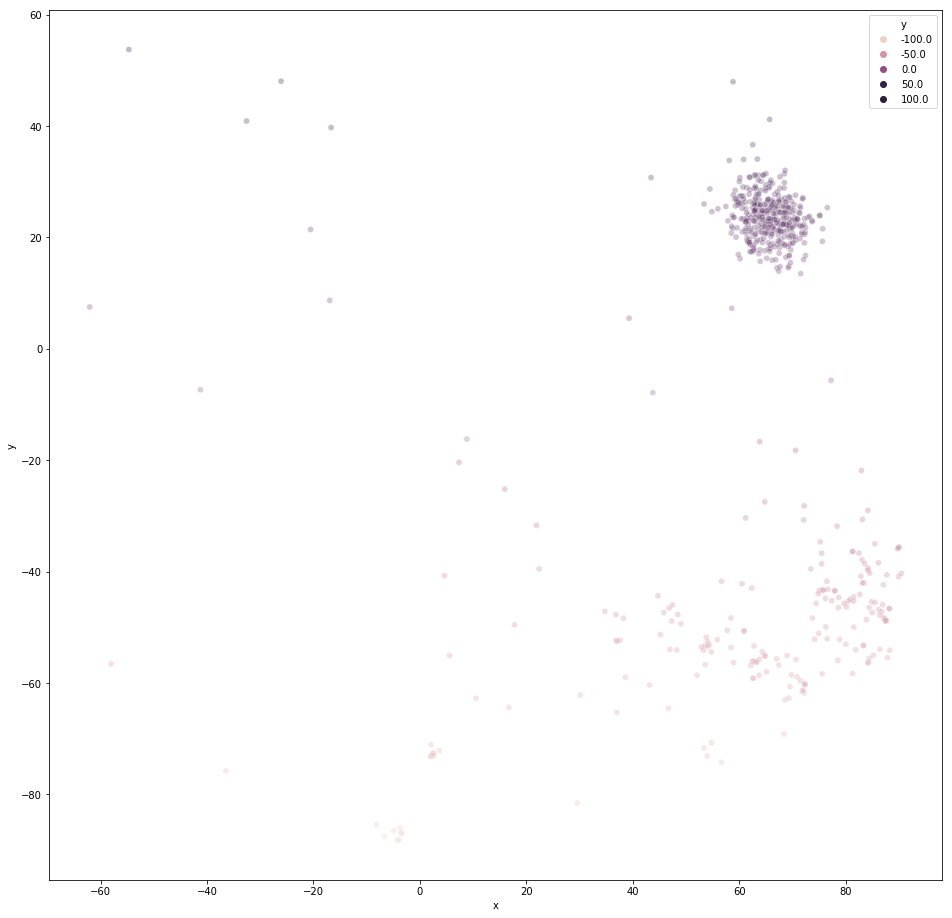

In [110]:
tsne_plot(x_sub,y_sub,labels_sub,-120,120,-100,100,"All_data",-1,"off",sub_data)

<Figure size 1152x1152 with 0 Axes>

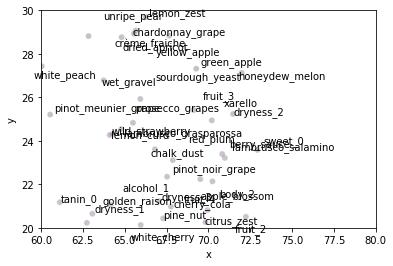

In [109]:
tsne_plot(x_sub,y_sub,labels_sub,60,80,20,30,"zoom1",100,"on",sub_data)

<Figure size 1152x1152 with 0 Axes>

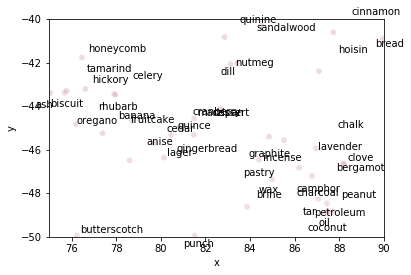

In [111]:
tsne_plot(x_sub,y_sub,labels_sub,75,90,-50,-40,"zoom1",-1,"on",sub_data)

<Figure size 1152x1152 with 0 Axes>

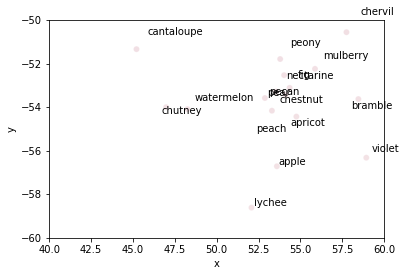

In [117]:
tsne_plot(x_sub,y_sub,labels_sub,40,60,-60,-50,"zoom3",-1,"on",sub_data)

##### The results are fairly interesting as most similar flavors are closer together